# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression, f_classif

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## №1 (20 баллов)

- Задача минимизации для множественной регресии:
$$(Y - X\hat{\beta})^T(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решение задачи минимизации, вывод формулы для оценок коэффициентов $\hat{\beta}$

Нам нужно минимизировать следующую функцию:

$$ L = \sum_{i=1}^{n} e_{i}^2 \rightarrow \min_{\hat{\beta}} $$
    
$$ L = \sum_{i=1}^{n} (Y - X\hat{\beta})^T(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}} $$


Чтобы минимизировать, нужно приравнять производную по $ \hat{\beta} $ к нулю:

$$ \frac{\partial L}{\partial \hat{\beta}} = \sum_{i=1}^{n} Y^TY + \hat{\beta}^TX^TX\hat{\beta} - Y^TX\hat{\beta} - \hat{\beta}^TX^TY = 0$$


Учтём cледующее: 

$$ \hat{\beta}^TX^TY = Y^TX\hat{\beta} $$
$$ \frac{\mathrm d}{\mathrm d \hat{\beta}} \left(\hat{\beta}^TX^TX\hat{\beta} \right) = (X^TX + (X^TX)^T)\hat{\beta} = 2X^TX\hat{\beta} $$
$$ \frac{\mathrm d}{\mathrm d \hat{\beta}} \left(-2Y^TX\hat{\beta} \right) = -2X^TY $$

Тогда получим:

$$ -2X^TY + 2X^TX\hat{\beta} = 0 $$
$$ X^TX\hat{\beta} = X^TY $$

И получим окончательную формулу для коэффициентов:

$$ \hat{\beta} = (X^TX)^{-1}X^TY $$

## №2 (40 баллов)

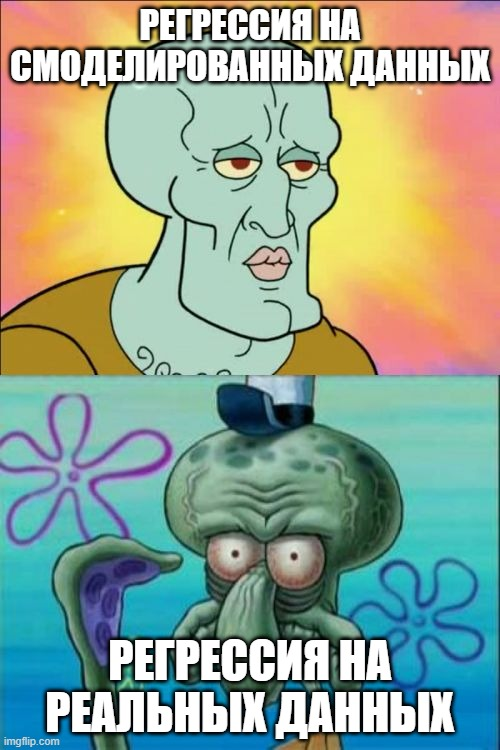

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_old` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

### Первичный осмотр

In [2]:
data = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Эконометрика/дз_1/HW_001_001.csv')

In [3]:
data.head()

,react,correct,omissions,no2_class,no2_home,age,age0,sex,grade,overweight,...,msmoke,meducation,feducation,siblings_old,siblings_young,sev_home,green_home,noise_school,sev_school,precip
0,764.584000,125.0,2.0,16.087734,26.794014,10.340862,8.0,Female,4th,Normal weight,...,No smoking,Secondary,Secondary,1.0,0.0,0.838710,0.426315,35.2,0.645161,0.3
1,855.818898,127.0,1.0,16.087734,33.398342,10.234086,3.0,Female,4th,Normal weight,...,No smoking,University,Secondary,0.0,1.0,0.290323,0.228674,35.2,0.645161,0.3
2,932.983051,118.0,4.0,16.087734,29.154180,9.015742,3.0,Male,3rd,Normal weight,...,No smoking,University,University,0.0,1.0,0.612903,0.298590,35.2,0.645161,0.3
3,506.440945,127.0,0.0,16.087734,25.067272,10.428473,3.0,Female,4th,Overweight,...,No smoking,University,Secondary,0.0,1.0,0.483871,0.360645,35.2,0.645161,0.3
4,580.301587,126.0,0.0,16.087734,30.572056,9.330595,6.0,Male,3rd,Normal weight,...,No smoking,University,University,1.0,0.0,0.612903,0.239222,35.2,0.645161,0.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   react           1084 non-null   float64
 1   correct         1084 non-null   float64
 2   omissions       1084 non-null   float64
 3   no2_class       1089 non-null   float64
 4   no2_home        1089 non-null   float64
 5   age             1089 non-null   float64
 6   age0            1082 non-null   float64
 7   sex             1089 non-null   object 
 8   grade           1089 non-null   object 
 9   overweight      1063 non-null   object 
 10  lbweight        1089 non-null   object 
 11  breastfeed      1088 non-null   object 
 12  msmoke          1087 non-null   object 
 13  meducation      1089 non-null   object 
 14  feducation      1086 non-null   object 
 15  siblings_old    1081 non-null   float64
 16  siblings_young  1083 non-null   float64
 17  sev_home        1089 non-null   f

In [5]:
data.isna().mean().sort_values() * 100

lbweight          0.000000
noise_school      0.000000
green_home        0.000000
sev_home          0.000000
meducation        0.000000
sev_school        0.000000
grade             0.000000
precip            0.000000
age               0.000000
no2_home          0.000000
no2_class         0.000000
sex               0.000000
breastfeed        0.091827
msmoke            0.183655
feducation        0.275482
omissions         0.459137
correct           0.459137
react             0.459137
siblings_young    0.550964
age0              0.642792
siblings_old      0.734619
overweight        2.387511
dtype: float64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
react,1084.0,742.480809,145.444639,434.071429,632.705707,719.478375,839.835675,1303.259843
correct,1084.0,121.826568,7.001609,60.000000,120.000000,124.000000,126.000000,128.000000
omissions,1084.0,1.728782,3.812825,0.000000,0.000000,1.000000,2.000000,50.000000
no2_class,1089.0,30.167792,9.895886,7.794096,22.818430,29.910334,36.598255,52.563970
no2_home,1089.0,54.718322,18.047859,2.076335,44.562218,54.268135,61.743267,118.656770
age,1089.0,9.087880,0.886907,7.452430,8.364134,9.067761,9.746749,11.633128
age0,1082.0,3.218022,1.293168,0.000000,3.000000,3.000000,3.000000,9.000000
siblings_old,1081.0,0.573543,0.675225,0.000000,0.000000,0.000000,1.000000,4.000000
siblings_young,1083.0,0.565097,0.690683,0.000000,0.000000,0.000000,1.000000,6.000000
sev_home,1089.0,0.419681,0.199914,0.064516,0.258064,0.387097,0.580645,0.967742


**Вывод:**

В нашем доступе есть датасет с 22 признаками. Один из них задан как целевой - react - время реакции (ms).

В датасете около 1000 значений, присутствуют пропуски, в будущем посомтрим, можно ли их юудет устранить. Пропусков небольшое количество, не больше 3% на один признак, поэтому, возможно, корректнее от них будет избавиться.

Данных много, конкретно про что-то не сказать, будем смотреть детальнее.

Выделим количественные и категориальные признаки:

In [7]:
quantitative_columns = data.columns[data.dtypes == 'float64']
object_columns = data.columns[data.dtypes == 'object']

### Исследуем количественные признаки

In [8]:
def get_info_quantitative(data, column: str, xlable: str, ylable: str, title: str) -> None:
    print(f'mean: {data[column].mean()}')
    print(f'median: {data[column].median()}')
    print(f'min-max: {data[column].min()} - {data[column].max()}')
    
    plt.figure(figsize=(15,15))
    plt.subplot(312)
    sns.distplot(data[column], bins=50)
    
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.title(title)
    plt.show()

In [9]:
def data_dependency(data, column: str, main_column='react') -> None:
    plt.figure(figsize=(10,10))
    plt.plot(data[column], data['react'], 'o')

    plt.xlabel(f'{column}', fontsize=10)
    plt.ylabel(f'{main_column}', fontsize=10)
    plt.title(f'Зависимость {main_column} от {column}', fontsize=15)
    plt.show()

#### Колонка react (целевой)

mean: 742.480808697913
median: 719.47837531654
min-max: 434.071428571429 - 1303.25984251968


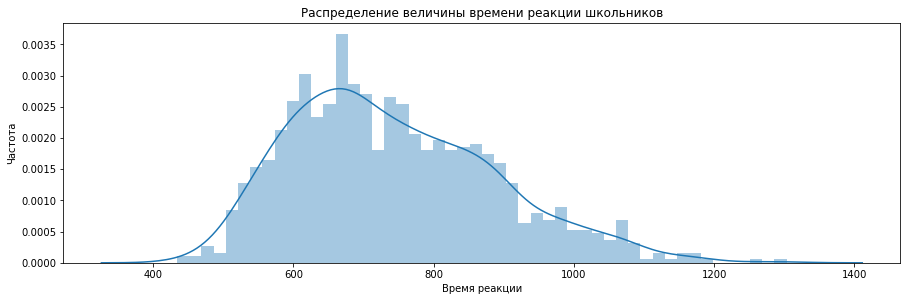

In [10]:
get_info_quantitative(
    data, 
  'react', 
  'Время реакции', 
  'Частота', 
  'Распределение величины времени реакции школьников'
)

Примено ожидаемое распределение: преобладают значения, которые ближе к среднему. 

#### Колонка correct

mean: 121.82656826568265
median: 124.0
min-max: 60.0 - 128.0


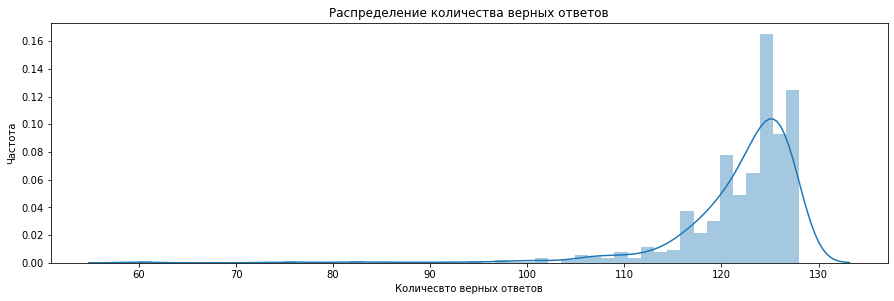

In [11]:
get_info_quantitative(
    data, 
  'correct', 
  'Количесвто верных ответов', 
  'Частота', 
  'Распределение количества верных ответов'
)

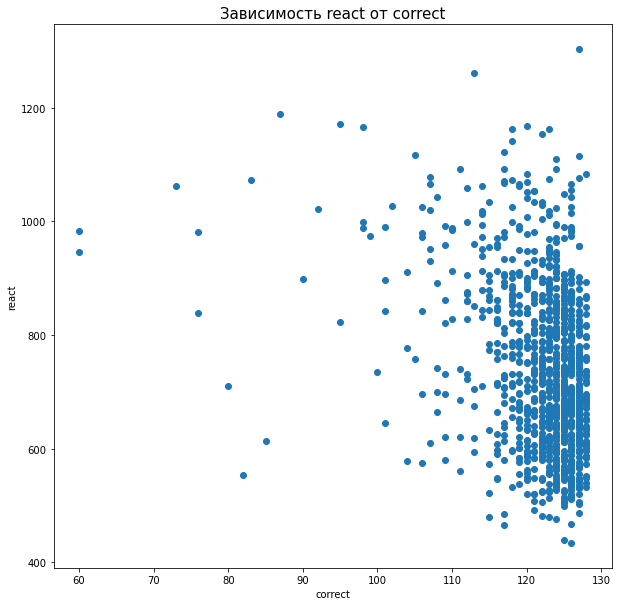

In [12]:
data_dependency(data, 'correct')

У многих учеников результат близкий к максимуму.

#### Колонка omissions

mean: 1.7287822878228782
median: 1.0
min-max: 0.0 - 50.0


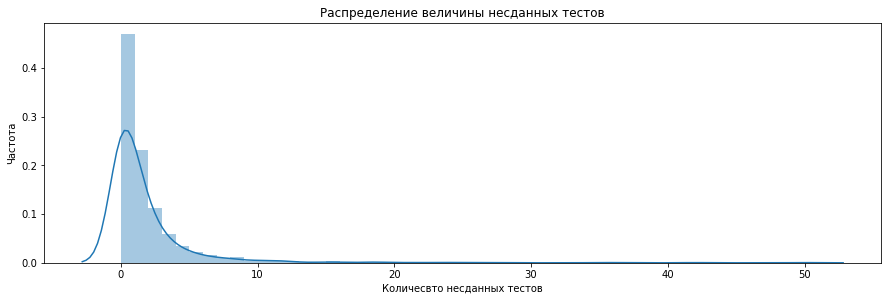

In [13]:
get_info_quantitative(
    data, 
  'omissions', 
  'Количесвто несданных тестов', 
  'Частота', 
  'Распределение величины несданных тестов'
)

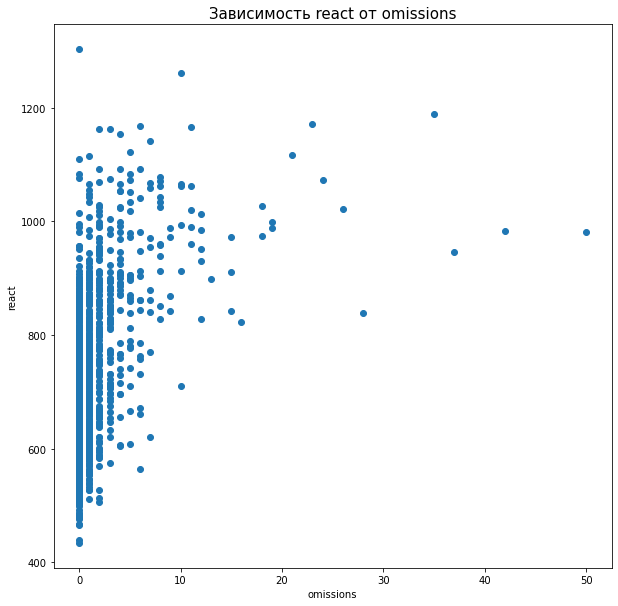

In [14]:
data_dependency(data, 'omissions')

Присутствуют количество несданных тестов больше 1. Видимо, один человек мог проходить сразу несколько тестов или же данный признак означает количество неверных ответов в тесте.

#### Колонка no2_class

mean: 30.16779152892523
median: 29.910334
min-max: 7.7940955 - 52.56397


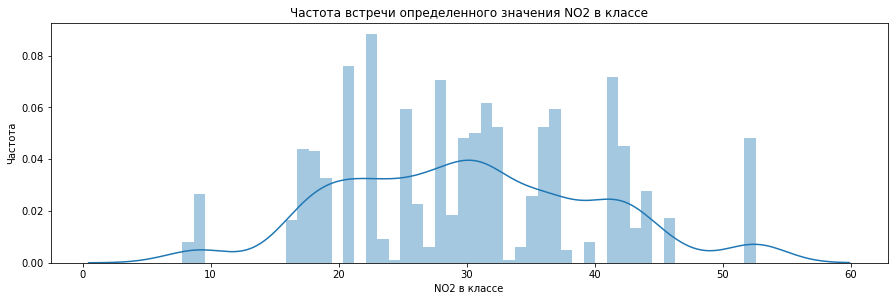

In [15]:
get_info_quantitative(
    data, 
  'no2_class', 
  'NO2 в классе', 
  'Частота', 
  'Частота встречи определенного значения NO2 в классе'
)

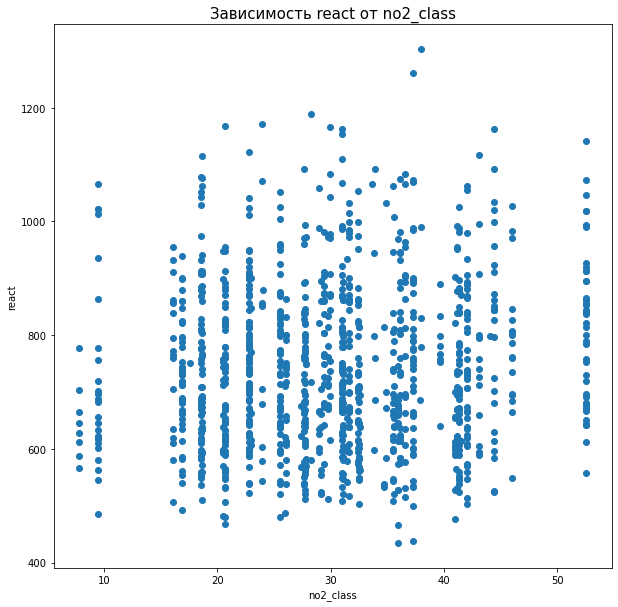

In [16]:
data_dependency(data, 'no2_class')

Зависимость не прослеживается. Проявляются некоторые определенные значения концентрации, возможно, существуют некоторые стандарты концентрации NO2 в классе, которым следует определенная школа.

#### Колонка no2_home

mean: 54.71832216776859
median: 54.268135
min-max: 2.0763352 - 118.65677


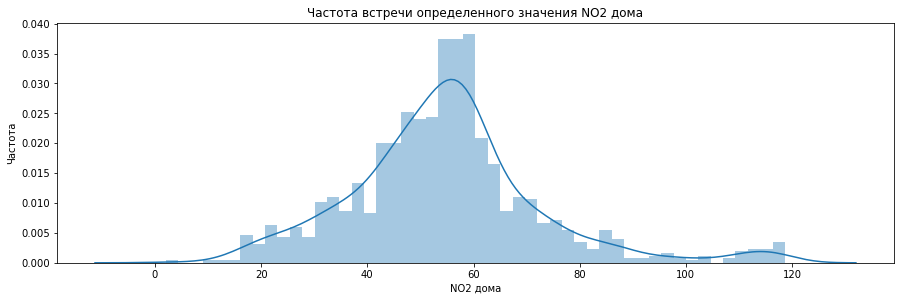

In [17]:
get_info_quantitative(
    data, 
  'no2_home', 
  'NO2 дома', 
  'Частота', 
  'Частота встречи определенного значения NO2 дома'
)

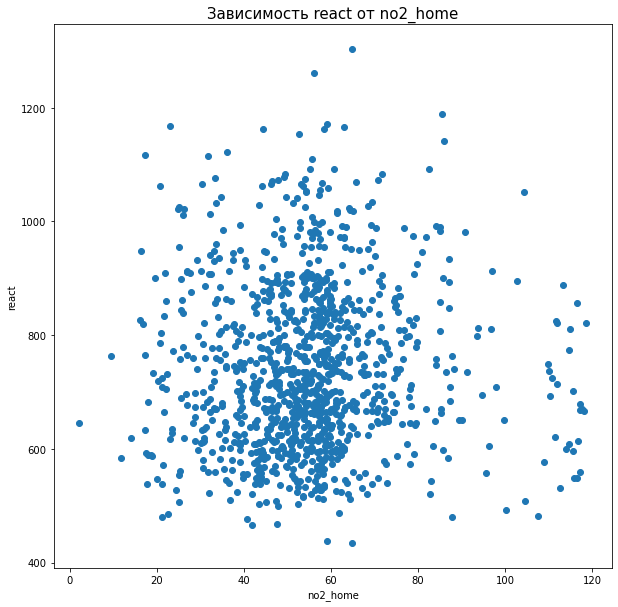

In [18]:
data_dependency(data, 'no2_home')

Распределение концентрации колокообразное, зависимость react от no2_home как таковая не наблюдается.

#### Колонка age

mean: 9.087879569237826
median: 9.067761
min-max: 7.45243 - 11.633128


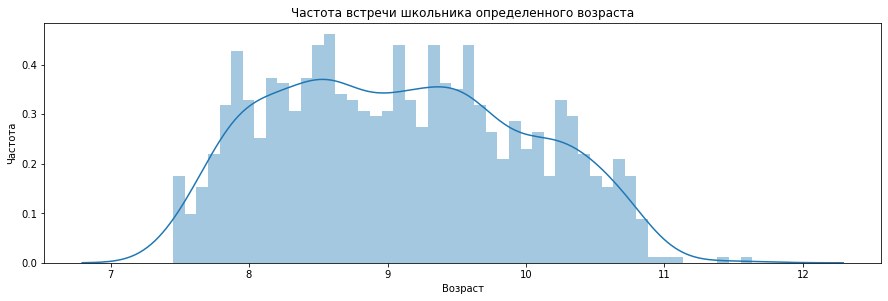

In [19]:
get_info_quantitative(
    data, 
  'age', 
  'Возраст', 
  'Частота', 
  'Частота встречи школьника определенного возраста'
)

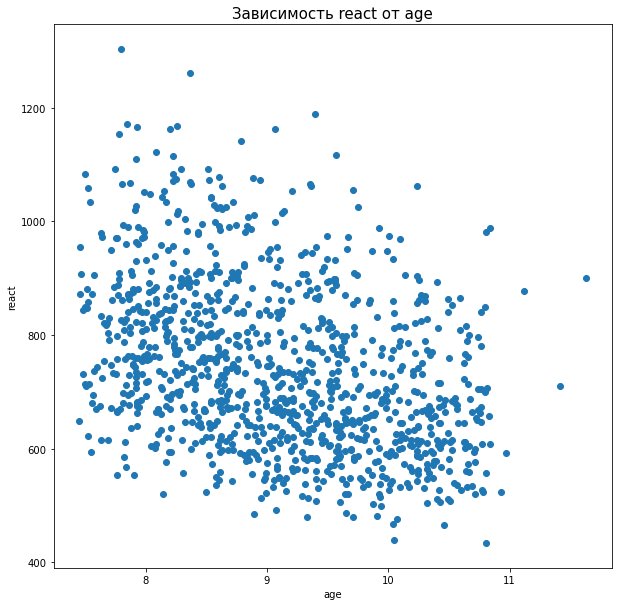

In [20]:
data_dependency(data, 'age')

Возраст записан не только в годах, но и учитываются более точные значения. Поэтому значения не int, а float.

На графике зависимости видим некоторую корреляцию, с отрицательным значением угла наклона.

#### Колонка age0

mean: 3.218022181146026
median: 3.0
min-max: 0.0 - 9.0


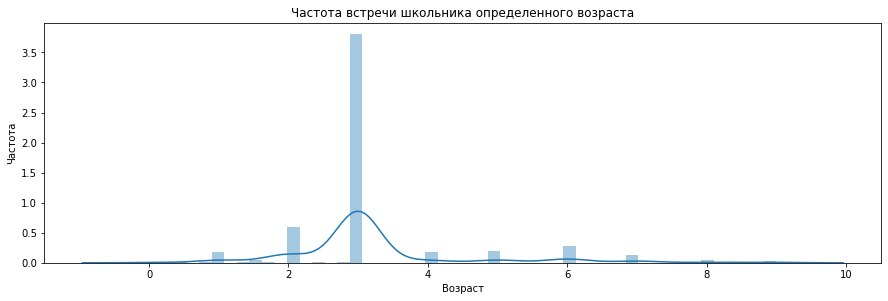

In [21]:
get_info_quantitative(
    data, 
  'age0', 
  'Возраст', 
  'Частота', 
  'Частота встречи школьника определенного возраста'
)

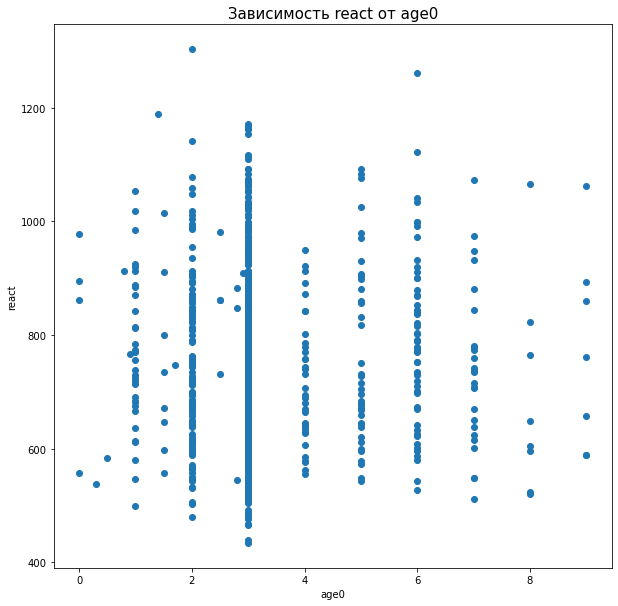

In [22]:
data_dependency(data, 'age0')

Странно, что существуют значения близкие к нулю, возможно, тогда при описании данных была ошибка, и колонка age0 говорит нам не о возрасте поступления в школу, а возраст поступления в школу/детский сад. Либо нужно больше узнать о системе образования в Испании.

#### Колонка siblings_old

mean: 0.5735430157261795
median: 0.0
min-max: 0.0 - 4.0


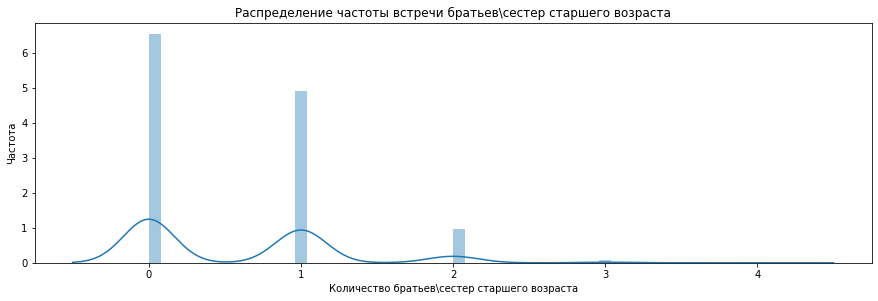

In [23]:
get_info_quantitative(
    data, 
  'siblings_old', 
  'Количество братьев\сестер старшего возраста', 
  'Частота', 
  'Распределение частоты встречи братьев\сестер старшего возраста'
)

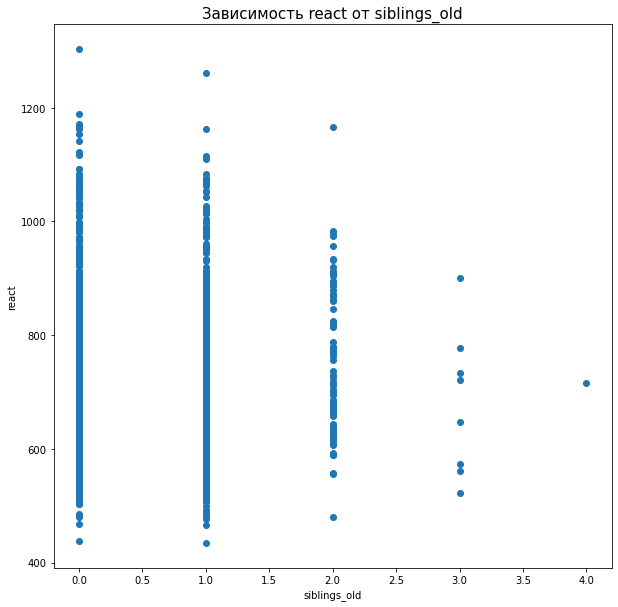

In [24]:
data_dependency(data, 'siblings_old')

Определенная зависимость не прослеживается, но можно выдвинуть гипотезу: чем больше братьев/сестер старшего возраста, тем значения ближе к среднему по react.

#### Колонка siblings_young

mean: 0.5650969529085873
median: 0.0
min-max: 0.0 - 6.0


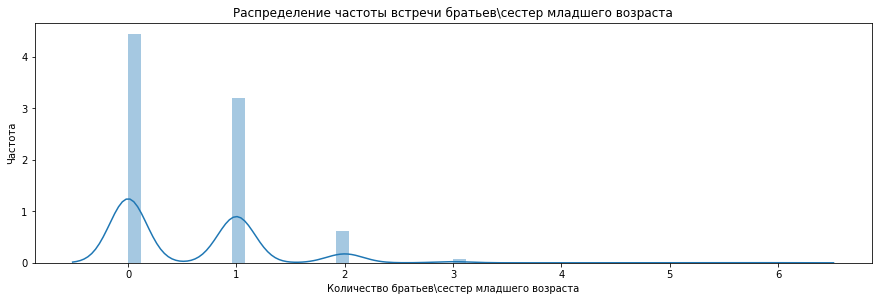

In [25]:
get_info_quantitative(
    data, 
  'siblings_young', 
  'Количество братьев\сестер младшего возраста', 
  'Частота', 
  'Распределение частоты встречи братьев\сестер младшего возраста'
)

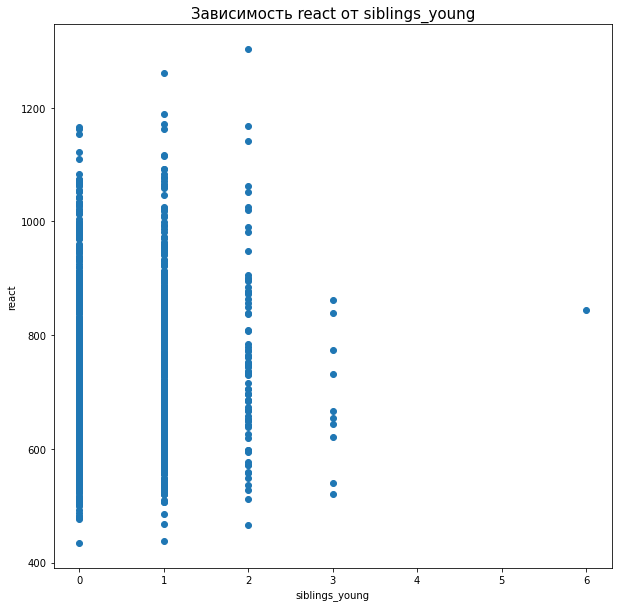

In [26]:
data_dependency(data, 'siblings_young')

Определенной зависимости не наблюдается.

#### Колонка sev_home

mean: 0.41968066928374514
median: 0.38709676
min-max: 0.06451613 - 0.9677419


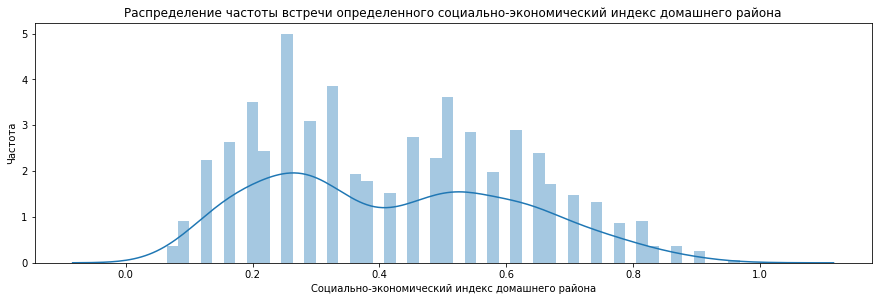

In [27]:
get_info_quantitative(
    data, 
  'sev_home', 
  'Социально-экономический индекс домашнего района', 
  'Частота', 
  'Распределение частоты встречи определенного социально-экономический индекс домашнего района'
)

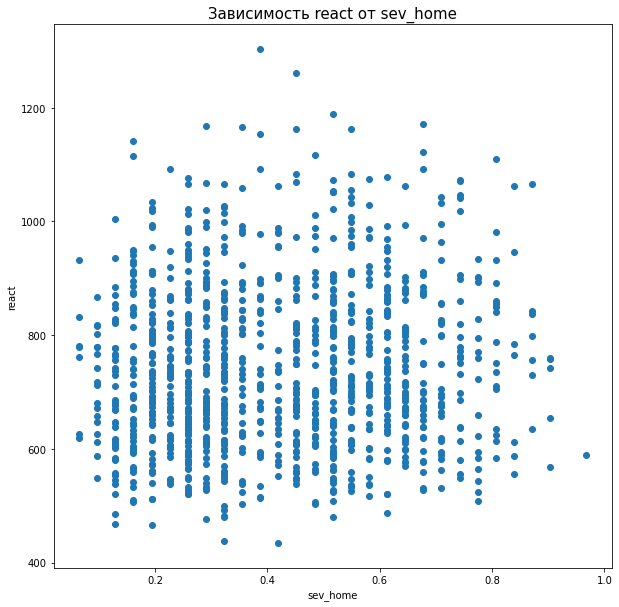

In [28]:
data_dependency(data, 'sev_home')

Определенной зависимсоти от react не наблюдается.

#### Колонка green_home

mean: 0.19807213801915985
median: 0.167832031846
min-max: 0.0184282701311 - 0.525867922904


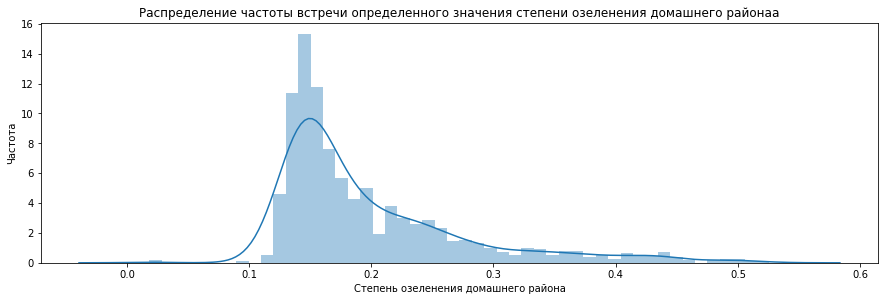

In [29]:
get_info_quantitative(
    data, 
  'green_home', 
  'Степень озеленения домашнего района', 
  'Частота', 
  'Распределение частоты встречи определенного значения степени озеленения домашнего районаа'
)

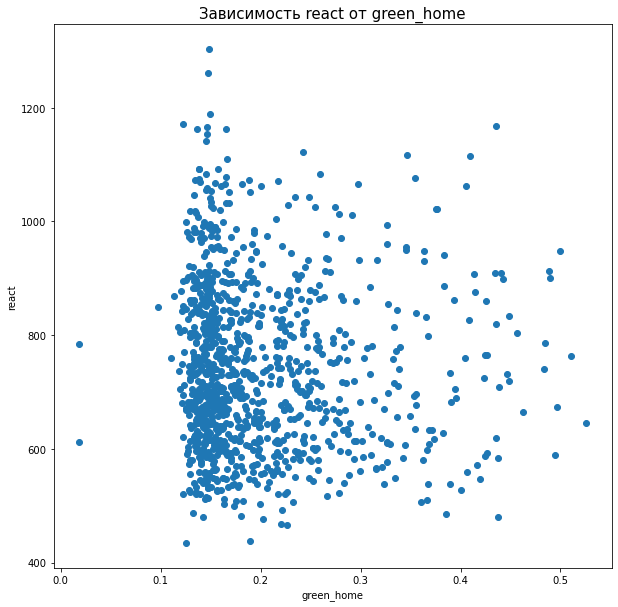

In [30]:
data_dependency(data, 'green_home')

Определенной зависимости не наблюдается.

#### Колонка noise_school

mean: 37.96354453627166
median: 38.0
min-max: 28.8 - 51.1


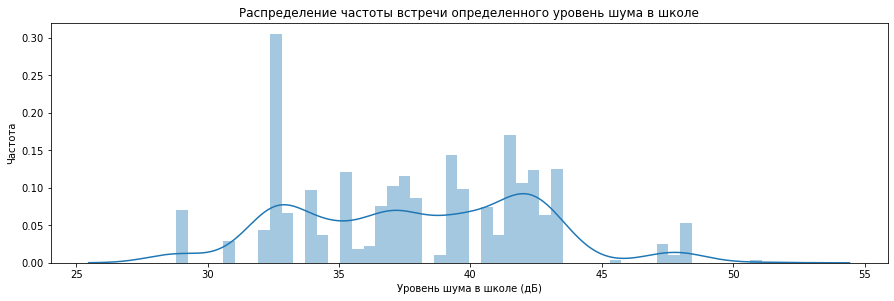

In [31]:
get_info_quantitative(
    data, 
  'noise_school', 
  'Уровень шума в школе (дБ)', 
  'Частота', 
  'Распределение частоты встречи определенного уровень шума в школе'
)

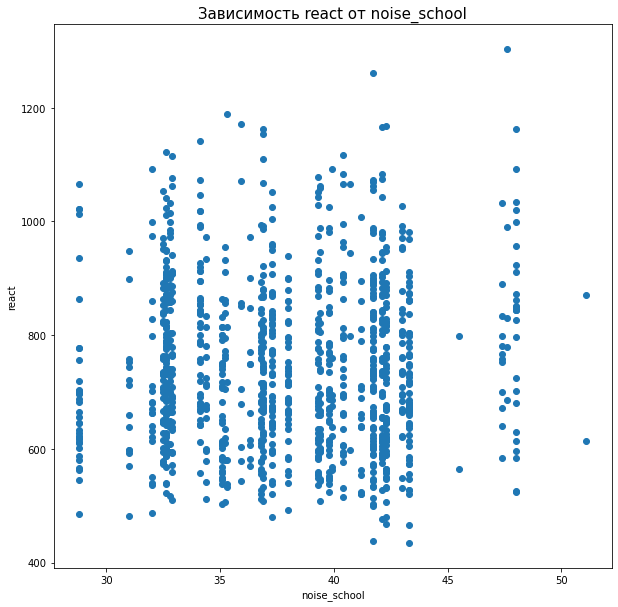

In [32]:
data_dependency(data, 'noise_school')

Определенной зависимости не наблюдается.

#### Колонка sev_school

mean: 0.40963890349862453
median: 0.38709676
min-max: 0.12903225 - 0.83870965


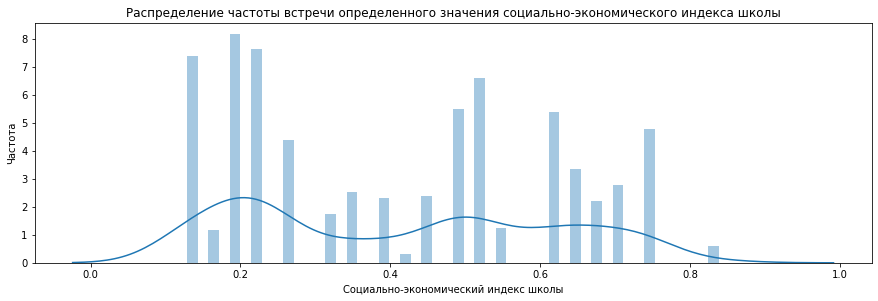

In [33]:
get_info_quantitative(
    data, 
  'sev_school', 
  'Социально-экономический индекс школы', 
  'Частота', 
  'Распределение частоты встречи определенного значения социально-экономического индекса школы'
)

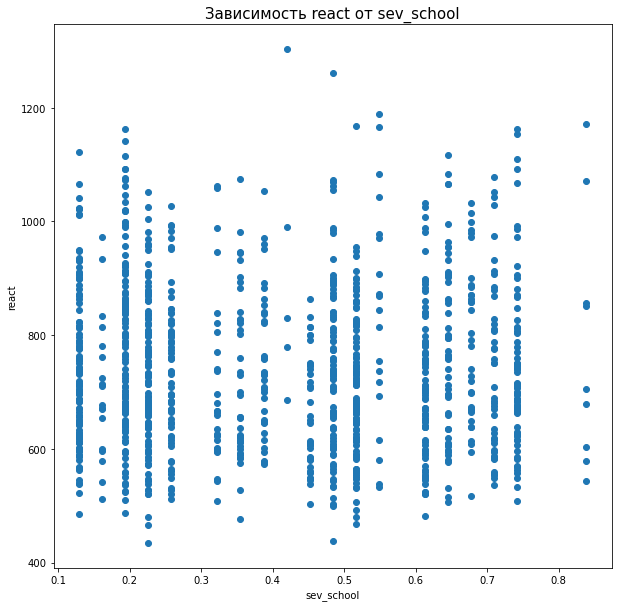

In [34]:
data_dependency(data, 'sev_school')

Определенной зависимости также не наблюдается.

#### Колонка precip

mean: 0.5593204775022963
median: 0.0
min-max: 0.0 - 5.8


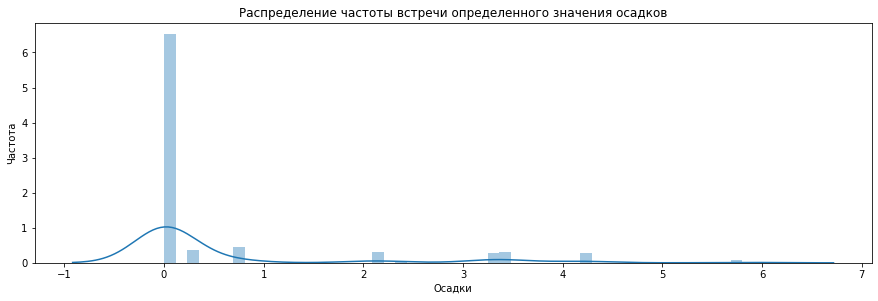

In [35]:
get_info_quantitative(
    data, 
  'precip', 
  'Осадки', 
  'Частота', 
  'Распределение частоты встречи определенного значения осадков'
)

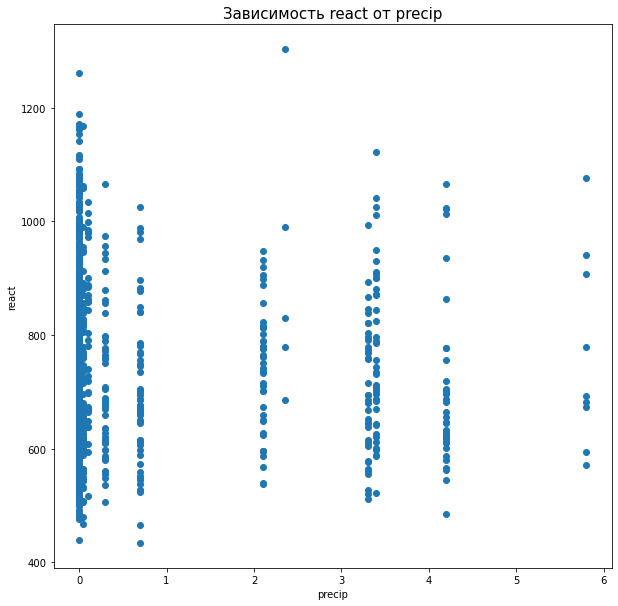

In [36]:
data_dependency(data, 'precip')

Определенной зависимости не наблюдается.

#### Вывод

Где-то мы увидели определенные зависимости, где-то они не проглядывались, не исключено, что признаки могут зависеть друг от друга (не считая целевой), чтобы не продолжать это длинное исследование в таком виде, посмотрим на heatmap

#### Посмотрим на heatmap

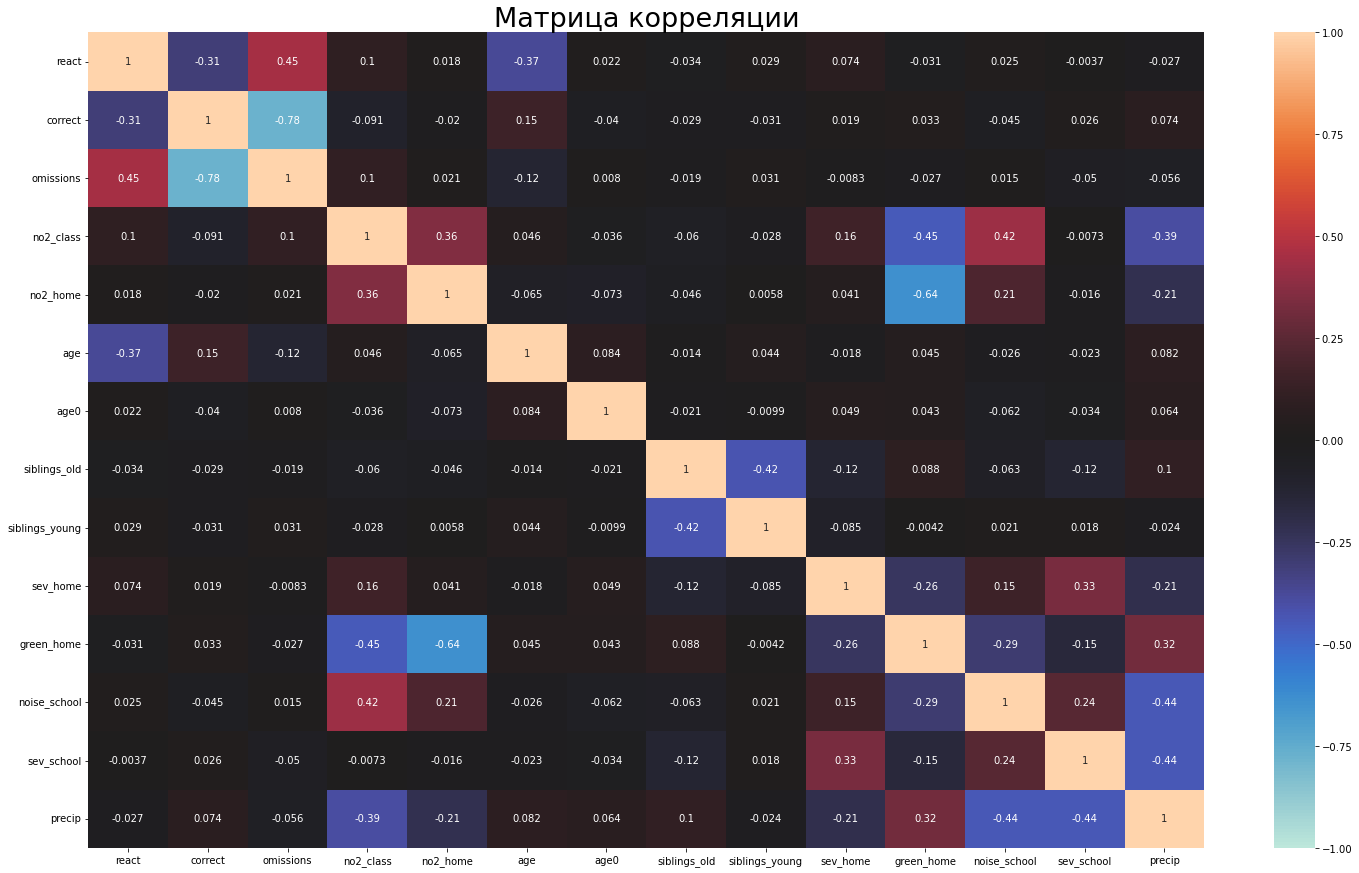

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(data[quantitative_columns].corr(), annot=True, vmin=-1, vmax=1, center=0)

plt.title('Матрица корреляции', fontsize=27)
plt.show()

**Вывод:**

Heatmap не показывает зависимость от object переменных.

Также видим, что те признаки от которых зависит react в большей степени коррелируют между собой, что может говорить о мультиколлинеарность, тогда нужно будет смотреть на практике и избавляться от некоторых.

### Исследуем зависимость от object признаков

In [38]:
def get_info_object(data, column: str, legend: list, search_column='react') -> None:
    print(data[column].value_counts(normalize=True))
    
    plt.figure(figsize=(12,6))
    data[search_column].hist(alpha=0.8)
    for value in legend[1:]: 
        data[data[column] == value][search_column].hist(alpha=0.65)

    plt.legend(legend)
    plt.xlabel(f'Количество затраченного времени {search_column}')
    plt.ylabel('Количество человек')
    plt.title(f'Частота {column} в зависимости от {search_column}')
    plt.show()

#### Колонка sex

Male      0.501377
Female    0.498623
Name: sex, dtype: float64


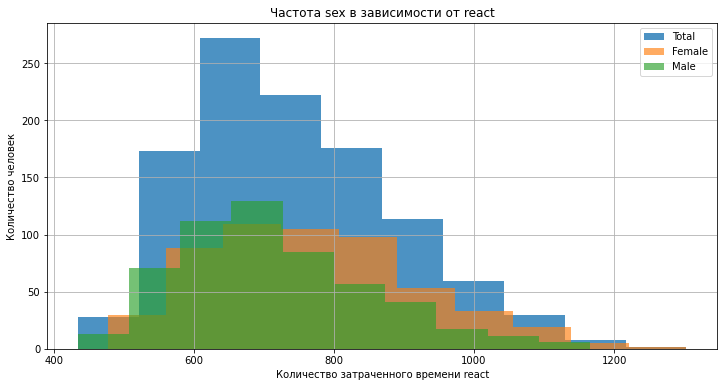

In [39]:
get_info_object(data, 'sex', ['Total', 'Female', 'Male'])

**Вывод:** распределения, в принципе, выглядят одинаково, но видно, что у девочек(female) чуть больше хороших резельтатов, меньше плохих.

#### Колонка grade

2nd    0.378329
3rd    0.364555
4th    0.257117
Name: grade, dtype: float64


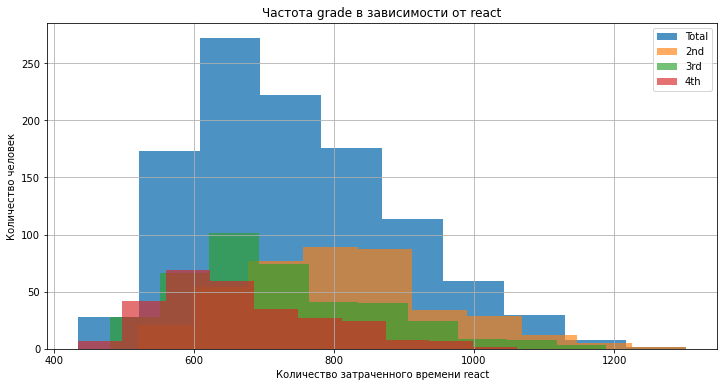

In [40]:
get_info_object(data, 'grade', ['Total', '2nd', '3rd', '4th'])

**Вывод:** прослеживается зависимость, чем большая цифра класса, тем хуже результат. Но у нас есть дисбаланс.

#### Колонка overweight

Normal weight    0.759172
Overweight       0.240828
Name: overweight, dtype: float64


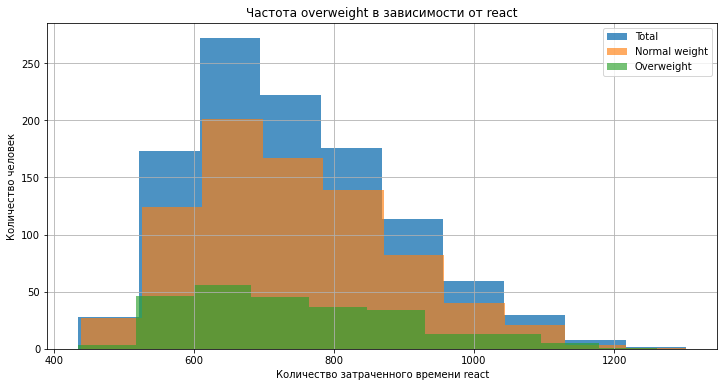

In [41]:
get_info_object(data, 'overweight', ['Total', 'Normal weight', 'Overweight'])

**Вывод:** в признаке есть несколько пропусков (около 2,5%), большую часть составляют ученики с нормальным весом. Сильный дисбаланс.

#### Колонка lbweight

Normal birthweight    0.914601
Low birthweight       0.085399
Name: lbweight, dtype: float64


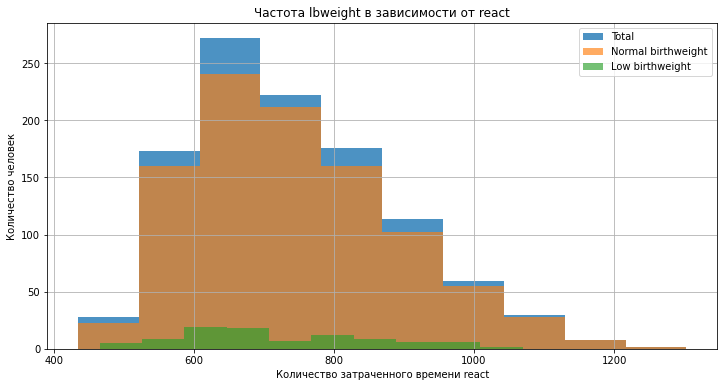

In [42]:
get_info_object(data, 'lbweight', ['Total', 'Normal birthweight', 'Low birthweight'])

**Вывод:** тоже сильный дисбаланс, какой-то взаимосвязи не наблюдается.

#### Колонка breastfeed

<6 months           0.551471
>6 months           0.289522
No breastfeeding    0.159007
Name: breastfeed, dtype: float64


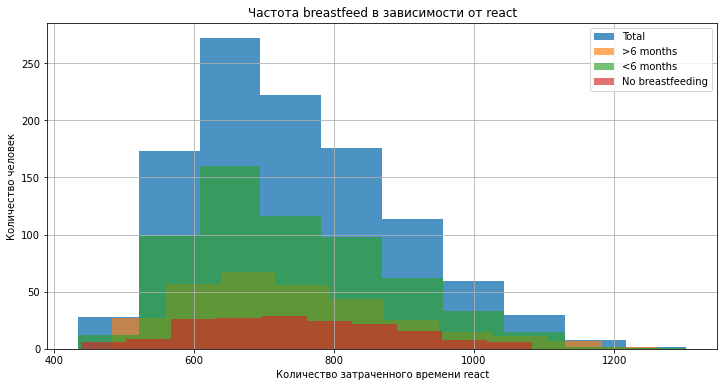

In [43]:
get_info_object(data, 'breastfeed', ['Total', '>6 months', '<6 months', 'No breastfeeding'])

**Вывод:** особой взаимосвязи не наблюдается. также есть дисбаланс

#### Колонка msmoke

No smoking    0.961362
Smoking       0.038638
Name: msmoke, dtype: float64


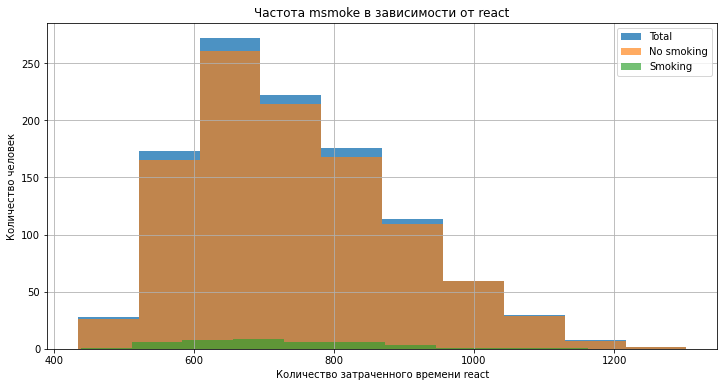

In [44]:
get_info_object(data, 'msmoke', ['Total', 'No smoking', 'Smoking'])

**Вывод:** особой взаимосвязи не наблюдается. Есть большой дисбаланс

#### Колонка meducation

University    0.719008
Secondary     0.216713
Primary       0.059688
<Primary      0.004591
Name: meducation, dtype: float64


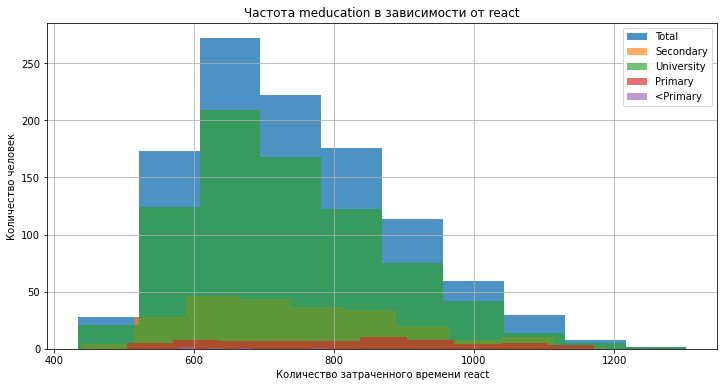

In [45]:
get_info_object(data, 'meducation', ['Total', 'Secondary', 'University', 'Primary', '<Primary'])

**Вывод:** особой взаимосвязи не наблюдается.

#### Колонка feducation

University    0.642726
Secondary     0.268877
Primary       0.079190
<Primary      0.009208
Name: feducation, dtype: float64


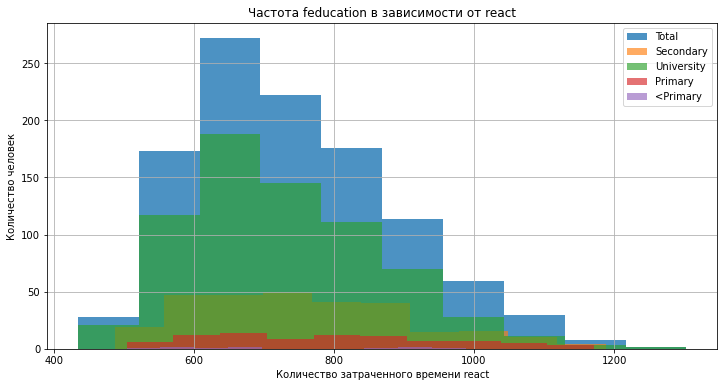

In [46]:
get_info_object(data, 'feducation', ['Total', 'Secondary', 'University', 'Primary', '<Primary'])

**Вывод:** особой взаимосвязи не наблюдается.

### Преобразование категориальных признаков

In [47]:
print(f'Всего в таблице {data.shape[1]} признака')

Всего в таблице 22 признака


Техникой one-hot-encoding получим из категориальных "фиктивные" признаки

In [48]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [49]:
print(f'Теперь в таблице {data_ohe.shape[1]} признаков')

Теперь в таблице 28 признаков


### Определим значащие для нас признаки

Очень сложно по графикам понять какие признаки для нас будут важны, поэтому воспользуемся методом SelectKBest.

Но прежде избавимся от пропусков в таблице.

In [50]:
print(f'Сейчас в таблице {data_ohe.shape[0]} строк')

Сейчас в таблице 1089 строк


In [51]:
data_ohe = data_ohe.dropna()

In [52]:
print(f'После очистки - {data_ohe.shape[0]} строк')

После очистки - 1068 строк


При удалении пропусков мы потеряли менее 2% от данных, что приемелемо.

Отделим целевой признак:

In [53]:
x = data_ohe.drop('react', axis=1)
y = data_ohe['react']

In [54]:
x.shape

(1068, 27)

In [55]:
y.shape

(1068,)

Хотим извлеч 10 наиболее значащих для нас признаков:

In [56]:
select = SelectKBest(score_func=f_regression, k=10)
new_x = select.fit_transform(x, y) 

In [57]:
new_x.shape

(1068, 10)

In [58]:
y.shape

(1068,)

Посмотрим на признаки, которые выбрала модель

In [59]:
select.get_feature_names_out()

array(['correct', 'omissions', 'no2_class', 'age', 'sex_Male',
       'grade_3rd', 'grade_4th', 'meducation_Primary',
       'feducation_Primary', 'feducation_University'], dtype=object)

Наши исследования данных объясняют выбор этих признаков.

### Первая версия модели

In [60]:
big_X = np.hstack((np.ones((y.shape[0], 1)), new_x))

In [61]:
ols = sm.OLS(endog=y, exog=big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     59.01
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           8.48e-95
Time:                        23:49:20   Log-Likelihood:                -6594.1
No. Observations:                1068   AIC:                         1.321e+04
Df Residuals:                    1057   BIC:                         1.326e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        695.7350    129.432      5.375      0.000     441.761     949.709
x1             2.1826      0.831      2.626      0.009       0.552       3.813
x2            17.3374      1.523     11.382      0.000      14.348      20.326
x3             1.0360      0.365      2.836      0.005       0.319       1.753
x4           -23.4402      9.979     -2.349      0.019     -43.022      -3.859
x5           -39.5653      7.305     -5.416      0.000     -53.899     -25.232
x6           -51.6315     13.346     -3.869      0.000     -77.820     -25.443
x7           -75.4095     22.511     -3.350      0.001    -119.581     -31.238
x8            26.8145     17.537      1.529      0.127      -7.597      61.226
x9            10.1807     15.999      0.636      0.525     -21.212      41.574
x10          -18.1808      8.189     -2.220      0.027     -34.249      -2.113
==============================================================================
Omnibus:                       42.574   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.894
Skew:                           0.404   Prob(JB):                     1.20e-12
Kurtosis:                       3.762   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

В целом регрессия значима, но присутствуют незначимые переменные, избавимся от них. (pvalue > 0.05)

In [62]:
big_X = big_X[:, [0, 1, 2, 3, 4, 5, 6, 7, 10]]

In [63]:
ols = sm.OLS(endog=y, exog=big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     73.09
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           9.16e-96
Time:                        23:49:20   Log-Likelihood:                -6596.2
No. Observations:                1068   AIC:                         1.321e+04
Df Residuals:                    1059   BIC:                         1.326e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        697.6577    129.555      5.385      0.000     443.444     951.871
x1             2.1992      0.832      2.644      0.008       0.567       3.831
x2            17.4050      1.524     11.418      0.000      14.414      20.396
x3             1.0255      0.366      2.805      0.005       0.308       1.743
x4           -23.0975      9.988     -2.313      0.021     -42.696      -3.499
x5           -39.4097      7.311     -5.390      0.000     -53.756     -25.064
x6           -52.8633     13.345     -3.961      0.000     -79.048     -26.678
x7           -77.5028     22.511     -3.443      0.001    -121.675     -33.331
x8           -23.8508      7.531     -3.167      0.002     -38.629      -9.073
==============================================================================
Omnibus:                       43.804   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.029
Skew:                           0.409   Prob(JB):                     4.13e-13
Kurtosis:                       3.783   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
print(f'R^2 = {ols.rsquared}\nR^2_adj = {ols.rsquared_adj}\nAIC = {ols.aic}\nBIC = {ols.bic}')

R^2 = 0.3557178823357541
R^2_adj = 0.3508507841853159
AIC = 13210.456300466723
BIC = 13255.218187642404


### Попытка улучшения

По одному из наших предполодения во время просмотра даннных было то, что omissions - это количество неверных ответов в тесте, значит эта величина должна коррелировать с признаком correct. Попробуем убрать из модели признак correct.

In [65]:
new_big_X = big_X[:, [0, 2, 3, 4, 5, 6, 7, 8]]

In [66]:
new_ols = sm.OLS(endog=y, exog=new_big_X).fit()
new_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     82.06
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.06e-95
Time:                        23:49:20   Log-Likelihood:                -6599.7
No. Observations:                1068   AIC:                         1.322e+04
Df Residuals:                    1060   BIC:                         1.326e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        961.0302     83.084     11.567      0.000     798.003    1124.057
x1            14.2608      0.957     14.909      0.000      12.384      16.138
x2             1.0025      0.367      2.735      0.006       0.283       1.722
x3           -21.6561     10.001     -2.165      0.031     -41.281      -2.032
x4           -42.8405      7.216     -5.937      0.000     -56.999     -28.682
x5           -54.0852     13.374     -4.044      0.000     -80.328     -27.842
x6           -78.6837     22.570     -3.486      0.001    -122.971     -34.396
x7           -23.7951      7.553     -3.151      0.002     -38.615      -8.975
==============================================================================
Omnibus:                       43.043   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.837
Skew:                           0.426   Prob(JB):                     3.36e-12
Kurtosis:                       3.679   Cond. No.                         796.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Метрики не улучшились, скорее наоборот упали. 

Но при этом мы уменьшили значение condition number, что хорошо.

Если улучшать модель, то стоит смотреть на её метрики вкупе, поэтому пока нет идей, как можно увеличить метрики, при этом модель и признаки должны остаться значимыми.

### Вывод

У нас получилась модель с $R^2 = 0.356$.
Он показывает нам какую часть изменчивости можно объяснить с помощью построенной модели.

In [67]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     73.09
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           9.16e-96
Time:                        23:49:20   Log-Likelihood:                -6596.2
No. Observations:                1068   AIC:                         1.321e+04
Df Residuals:                    1059   BIC:                         1.326e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        697.6577    129.555      5.385      0.000     443.444     951.871
x1             2.1992      0.832      2.644      0.008       0.567       3.831
x2            17.4050      1.524     11.418      0.000      14.414      20.396
x3             1.0255      0.366      2.805      0.005       0.308       1.743
x4           -23.0975      9.988     -2.313      0.021     -42.696      -3.499
x5           -39.4097      7.311     -5.390      0.000     -53.756     -25.064
x6           -52.8633     13.345     -3.961      0.000     -79.048     -26.678
x7           -77.5028     22.511     -3.443      0.001    -121.675     -33.331
x8           -23.8508      7.531     -3.167      0.002     -38.629      -9.073
==============================================================================
Omnibus:                       43.804   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.029
Skew:                           0.409   Prob(JB):                     4.13e-13
Kurtosis:                       3.783   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модель и признаки в отдельности значимы. Но некоторые тесты нам указывают на проблемы в данных, что говорит о том, что можно продолжить исследование и добиться вкусных результатов.

## №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

### Первичный осмотр данных

In [68]:
data_train = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Эконометрика/дз_1/HW_001_002/train.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [71]:
data_train.isna().mean().sort_values(ascending=False).head(12) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
dtype: float64

**Вывод:** Очень много признаков, есть как количественные, так и категориальные. Всего 81 признак, 1460 состояний, в некоторых признаках очень большой процент пропусков.

In [72]:
data_test = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Эконометрика/дз_1/HW_001_002/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [74]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [75]:
data_test.isna().mean().sort_values(ascending=False).head(12) * 100

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
dtype: float64

**Вывод:** тестовый датаест похож на тренировочный

In [76]:
quantitative_columns = data_train.columns[data_train.dtypes != 'object']
object_columns = data_train.columns[data_train.dtypes == 'object']

###  Количественный признак

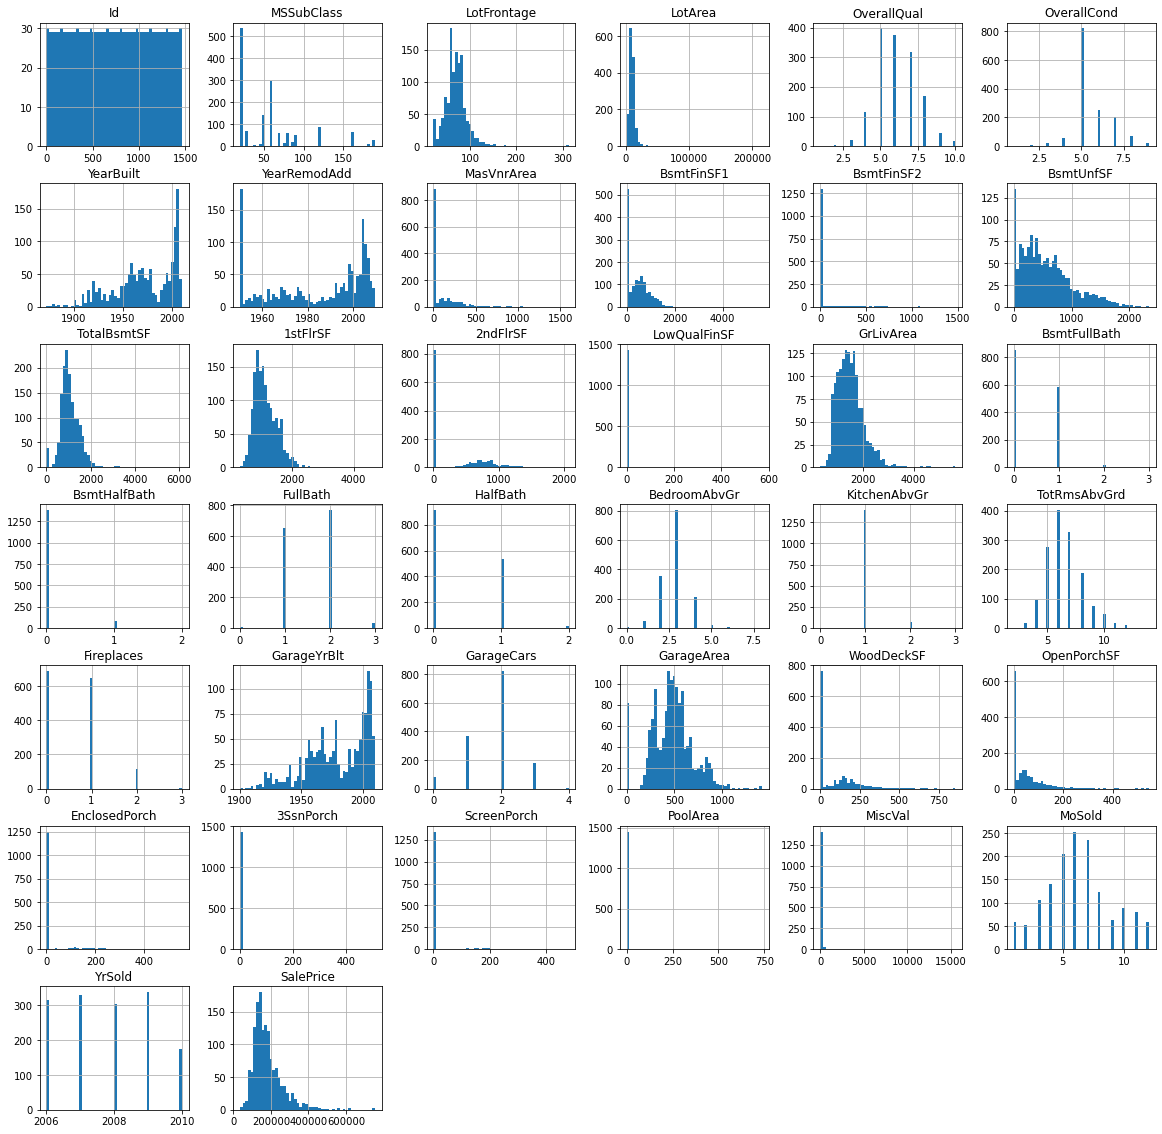

In [77]:
data_train[quantitative_columns].hist(bins=50, figsize=(20,20))
plt.show()

Где-то видны выбросы, где-то прослеживаются симметричные колокола, где-то отсутствует явная зависимость (в этих случаях ещё больше будет требоваться предобработка), где-то виден дискретный спектр значений. Нужен более тщательный анализ.

#### Работа с пропусками

In [78]:
data_train[quantitative_columns].isna().mean().sort_values(ascending=False).head(12) * 100

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
Id                0.000000
OpenPorchSF       0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
EnclosedPorch     0.000000
dtype: float64

##### LotFrontage

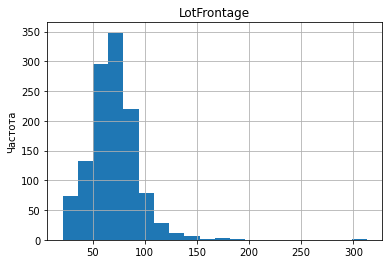

In [79]:
data_train.hist('LotFrontage', bins=20)
plt.ylabel('Частота')
plt.show()

Есть странный выброс, удалим его, пропуски заменим медианой.

In [80]:
data_train['LotFrontage'] = data_train[data_train['LotFrontage'] < 250]['LotFrontage']
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())

##### GarageYrBlt

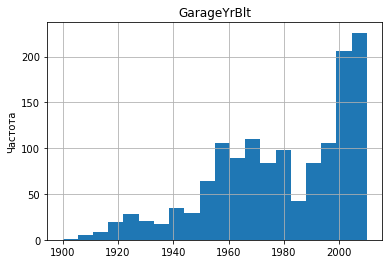

In [81]:
data_train.hist('GarageYrBlt', bins=20)
plt.ylabel('Частота')
plt.show()

Признак достаточно непрерывен, земеним пропуски медианой.

In [82]:
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].median())

##### MasVnrArea (Площадь каменной кладки в квадратных метрах)

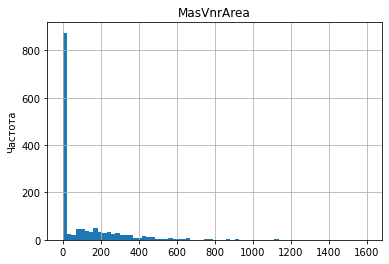

In [83]:
data_train.hist('MasVnrArea', bins=69)
plt.ylabel('Частота')
plt.show()

Пропущенных значений не так много, можно заменить на медианное сильно не нагрешим. 

In [84]:
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].median())

In [85]:
data_train[quantitative_columns].isna().mean().sort_values(ascending=False).head(12) * 100

Id               0.0
WoodDeckSF       0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
OpenPorchSF      0.0
MSSubClass       0.0
EnclosedPorch    0.0
dtype: float64

Пропуски обработаны

#### Вывод

Выдвинем следующие гипотезы:

Целевой признак должен хорошо объясняться следующими признаками:
- TotalBsmtSF (total square feet of basement area)
- OverallQual (rates the overall material and finish of the house)
- GrLivArea (above grade (ground) living area square feet)
- GarageArea (size of garage in square feet)

Так как это те признаки, которые отвечают за какие-либо построки на территории дома, а также площадь как дома, так и в целом участка, так и гаража.

### Категориальные признаки

In [86]:
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Работа с пропусками

In [87]:
data_train[object_columns].isna().mean().sort_values(ascending=False).head(12) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
dtype: float64

##### PoolQC (качество бассейна)

Пропуски означают, что бассейна нет, заменим их на значение 'NoP'

In [88]:
data_train['PoolQC'] = data_train['PoolQC'].fillna('NoP')

##### MiscFeature (разная функция, не включенная в другие категории)

Пропуски означают, что доп функций нет, поэтому заменим на 'NoF'

In [89]:
data_train['MiscFeature'] = data_train['MiscFeature'].fillna('NoF')

##### Alley (тип переулка доступа к собственности)

Если пропуск, значит нет доступа к аллее, заменим на 'NoA'

In [90]:
data_train['Alley'] = data_train['Alley'].fillna('NoA')

##### Fence (изгородь)

Пропуск означает нет изгороди, заменим на 'NoF'

In [91]:
data_train['Fence'] = data_train['Fence'].fillna('NoF')

##### FireplaceQu (качество камина)

Пропуск означает нет камина, заменим на 'NoFP'

In [92]:
data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna('NoFP')

##### GarageQual / GarageCond / GarageType / GarageFinish

Тот же принцип

In [93]:
data_train['GarageQual'] = data_train['GarageQual'].fillna('NoG')
data_train['GarageCond'] = data_train['GarageCond'].fillna('NoG')
data_train['GarageType'] = data_train['GarageType'].fillna('NoG')
data_train['GarageFinish'] = data_train['GarageFinish'].fillna('NoG')

##### BsmtExposure / BsmtFinType2 / BsmtCond / BsmtFinType1 / BsmtQual

Если нет подвала, то пропуск

In [94]:
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna('NoB')
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna('NoB')
data_train['BsmtCond'] = data_train['BsmtCond'].fillna('NoB')
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna('NoB')
data_train['BsmtQual'] = data_train['BsmtQual'].fillna('NoB')

##### MasVnrType

Кирпичная кладка типа шпона, пропуск - это значит нет кладки.

In [95]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('NoM')

##### Electrical

Пропуски не обоснованы ничем. Но электрической системы не может не быть, поэтому отметим пропуски как mix.  

In [96]:
data_train['Electrical'] = data_train['Electrical'].fillna('Mix')

In [97]:
data_train[object_columns].isna().mean().sort_values(ascending=False).head(12) * 100

MSZoning        0.0
FireplaceQu     0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Heating         0.0
HeatingQC       0.0
CentralAir      0.0
Electrical      0.0
KitchenQual     0.0
Functional      0.0
GarageType      0.0
BsmtCond        0.0
dtype: float64

Пропуски обработаны

Гипотезы:

Наша модель должна хорошо объясняться следующими категориальными признаками:

- Condition1, Condition2 так как они будут означать приближенность дома к какому-либо значимому объекту
- Также есть признаки отвечающие за качество материала дома: с наружней стороны - ExterCond, с внутренней стороны - ExterQual

Попробуем проделать следующее:

- Обучим модель использую только те признаки, которые вошли в наше предположения. Доработаем модель, если что-то будет незначимо.
- Далее попробуем использовать абсолютно все признаки и посмотрим какие значения метрик мы получим. Значимость упустим из виду.
- Далее попробуем с помощью модели kbest выявить лучших k признаков и обучим регрессию на них.

### Модель из предположений

In [98]:
data_train_1 = data_train[['SalePrice',
                           'Condition1', 'Condition2', 'ExterCond', 'ExterQual', 
                           'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'GarageArea']]
data_train_1.shape

(1460, 9)

In [99]:
data_train_1_ohe = pd.get_dummies(data_train_1, drop_first=True)
data_train_1_ohe.shape

(1460, 27)

In [100]:
data_train_1_ohe = data_train_1_ohe.dropna()
data_train_1_ohe.shape

(1460, 27)

In [101]:
x = data_train_1_ohe.drop('SalePrice', axis=1)
y = data_train_1_ohe['SalePrice']

In [102]:
big_X = np.hstack((np.ones((y.shape[0], 1)), x))

In [103]:
ols = sm.OLS(endog=y, exog=big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     208.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17402.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1433   BIC:                         3.500e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.712e+04   3.81e+04      0.450      0.653   -5.76e+04    9.18e+04
x1            25.1054      2.791      8.996      0.000      19.631      30.580
x2          1.852e+04   1196.458     15.479      0.000    1.62e+04    2.09e+04
x3            48.6176      2.406     20.203      0.000      43.897      53.338
x4            52.8992      5.802      9.118      0.000      41.519      64.280
x5          8932.9901   6922.072      1.291      0.197   -4645.491    2.25e+04
x6           2.36e+04   5645.617      4.179      0.000    1.25e+04    3.47e+04
x7          2.476e+04   1.41e+04      1.752      0.080   -2964.814    5.25e+04
x8          2.286e+04   1.05e+04      2.179      0.030    2277.065    4.34e+04
x9          4690.9167   1.24e+04      0.379      0.705   -1.96e+04     2.9e+04
x10         2.285e+04   9439.961      2.420      0.016    4329.736    4.14e+04
x11         8766.8911   2.66e+04      0.330      0.742   -4.34e+04    6.09e+04
x12         1.694e+04   1.78e+04      0.953      0.341   -1.79e+04    5.18e+04
x13        -3.367e+04   3.12e+04     -1.079      0.281   -9.49e+04    2.75e+04
x14        -1.079e+04   2.66e+04     -0.406      0.685   -6.29e+04    4.14e+04
x15        -8.983e+04   5.23e+04     -1.717      0.086   -1.92e+05    1.28e+04
x16        -2.113e+05   3.86e+04     -5.473      0.000   -2.87e+05   -1.36e+05
x17        -2.851e+04   4.55e+04     -0.626      0.531   -1.18e+05    6.08e+04
x18         -4.01e+04   4.55e+04     -0.882      0.378   -1.29e+05    4.91e+04
x19         4636.3500   3.75e+04      0.124      0.902   -6.89e+04    7.81e+04
x20        -2.177e+04    2.7e+04     -0.806      0.420   -7.47e+04    3.12e+04
x21        -1.213e+04   2.62e+04     -0.463      0.643   -6.35e+04    3.92e+04
x22        -1.181e+04   4.51e+04     -0.262      0.793      -1e+05    7.66e+04
x23        -1.449e+04    2.6e+04     -0.557      0.578   -6.55e+04    3.66e+04
x24        -7.526e+04   1.27e+04     -5.911      0.000      -1e+05   -5.03e+04
x25        -6.262e+04   5846.650    -10.710      0.000   -7.41e+04   -5.11e+04
x26        -7.894e+04   6554.691    -12.043      0.000   -9.18e+04   -6.61e+04
==============================================================================
Omnibus:                      627.273   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86401.820
Skew:                          -0.943   Prob(JB):                         0.00
Kurtosis:                      40.640   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Очень странное поведение у константы.
Удалим незначимые переменные и посмотрим ещё раз.

In [104]:
new_big_X = big_X[:, [0, 1, 2, 3, 4, 6, 8, 10, 16, 24, 25, 26]]

In [105]:
ols = sm.OLS(endog=y, exog=new_big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     491.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17409.
No. Observations:                1460   AIC:                         3.484e+04
Df Residuals:                    1448   BIC:                         3.490e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3236.8482   1.09e+04     -0.298      0.766   -2.45e+04    1.81e+04
x1            25.7192      2.767      9.294      0.000      20.291      31.147
x2          1.848e+04   1180.673     15.651      0.000    1.62e+04    2.08e+04
x3            48.3823      2.379     20.337      0.000      43.716      53.049
x4            53.1881      5.751      9.249      0.000      41.908      64.469
x5           1.72e+04   3198.714      5.378      0.000    1.09e+04    2.35e+04
x6          1.672e+04   9403.124      1.778      0.076   -1728.570    3.52e+04
x7          1.298e+04   7808.462      1.663      0.097   -2332.659    2.83e+04
x8             -2e+05    2.8e+04     -7.151      0.000   -2.55e+05   -1.45e+05
x9         -7.758e+04   1.23e+04     -6.294      0.000   -1.02e+05   -5.34e+04
x10        -6.101e+04   5783.122    -10.549      0.000   -7.24e+04   -4.97e+04
x11        -7.753e+04   6488.158    -11.949      0.000   -9.03e+04   -6.48e+04
==============================================================================
Omnibus:                      611.467   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81862.453
Skew:                          -0.897   Prob(JB):                         0.00
Kurtosis:                      39.640   Cond. No.                     5.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
new_big_X = new_big_X[:, [0, 1, 2, 3, 4, 5, 8, 9, 10, 11]]

In [107]:
ols = sm.OLS(endog=y, exog=new_big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     599.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17411.
No. Observations:                1460   AIC:                         3.484e+04
Df Residuals:                    1450   BIC:                         3.490e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1526.3109   1.08e+04     -0.141      0.888   -2.28e+04    1.97e+04
x1            25.7071      2.768      9.287      0.000      20.277      31.137
x2          1.861e+04   1180.000     15.769      0.000    1.63e+04    2.09e+04
x3            48.4598      2.377     20.387      0.000      43.797      53.123
x4            53.2190      5.756      9.245      0.000      41.927      64.511
x5          1.399e+04   2870.940      4.872      0.000    8356.770    1.96e+04
x6         -1.865e+05   2.67e+04     -6.983      0.000   -2.39e+05   -1.34e+05
x7         -7.804e+04   1.23e+04     -6.324      0.000   -1.02e+05   -5.38e+04
x8         -6.035e+04   5782.634    -10.437      0.000   -7.17e+04    -4.9e+04
x9         -7.693e+04   6489.894    -11.854      0.000   -8.97e+04   -6.42e+04
==============================================================================
Omnibus:                      624.594   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83898.764
Skew:                          -0.941   Prob(JB):                         0.00
Kurtosis:                      40.089   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Модель получилась с незначимой константой, попробуем убрать те признаки, у которых слишком большое значение коэффициента.

In [108]:
new_big_X = new_big_X[:, [0, 1, 3, 4]]

In [109]:
ols = sm.OLS(endog=y, exog=new_big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     951.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17752.
No. Observations:                1460   AIC:                         3.551e+04
Df Residuals:                    1456   BIC:                         3.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.411e+04   4045.540     -5.959      0.000    -3.2e+04   -1.62e+04
x1            49.1457      3.303     14.878      0.000      42.666      55.626
x2            68.7510      2.728     25.203      0.000      63.400      74.102
x3           103.3213      6.835     15.117      0.000      89.915     116.728
==============================================================================
Omnibus:                      753.868   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66612.996
Skew:                          -1.491   Prob(JB):                         0.00
Kurtosis:                      35.956   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Сейчас ок. Всё значимо.

В модель вошли следующие признаки: TotalBsmtSF, GrLivArea, GarageArea

### Посмотрим на обучение на всех данных

In [110]:
data_train.shape

(1460, 81)

In [111]:
data_train_ohe = pd.get_dummies(data_train, drop_first=True)
data_train_ohe.shape

(1460, 262)

In [112]:
x = data_train_ohe.drop('SalePrice', axis=1)
y = data_train_ohe['SalePrice']

In [113]:
big_X = np.hstack((np.ones((y.shape[0], 1)), x))

In [114]:
ols = sm.OLS(endog=y, exog=big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     66.61
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -16568.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1206   BIC:                         3.499e+04
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.746e+05   1.06e+06     -0.543      0.587   -2.65e+06     1.5e+06
x1             1.1140      1.548      0.720      0.472      -1.923       4.151
x2           -52.8890     82.709     -0.639      0.523    -215.158     109.380
x3            36.0504     46.653      0.773      0.440     -55.480     127.581
x4             0.7012      0.108      6.482      0.000       0.489       0.913
x5          6794.9546   1012.806      6.709      0.000    4807.897    8782.012
x6          5777.2244    871.231      6.631      0.000    4067.928    7486.521
x7           321.4036     77.042      4.172      0.000     170.252     472.555
x8           107.7124     55.774      1.931      0.054      -1.713     217.138
x9            20.9961      5.784      3.630      0.000       9.649      32.344
x10           15.7751      2.890      5.458      0.000      10.104      21.446
x11            8.4414      5.974      1.413      0.158      -3.280      20.163
x12           -1.7372      2.769     -0.627      0.531      -7.170       3.695
x13           22.4793      4.064      5.531      0.000      14.506      30.452
x14           18.6548      6.388      2.920      0.004       6.122      31.187
x15           36.2571      5.458      6.643      0.000      25.548      46.966
x16          -28.9758     13.918     -2.082      0.038     -56.283      -1.669
x17           25.9360      5.699      4.551      0.000      14.755      37.117
x18         1673.8882   1978.008      0.846      0.398   -2206.831    5554.607
x19         -451.0325   3024.248     -0.149      0.881   -6384.405    5482.339
x20         3609.5192   2197.660      1.642      0.101    -702.142    7921.180
x21         1896.1244   2095.872      0.905      0.366   -2215.836    6008.085
x22        -3622.1603   1362.890     -2.658      0.008   -6296.060    -948.261
x23        -1.332e+04   5690.635     -2.341      0.019   -2.45e+04   -2156.655
x24         1763.8427    956.536      1.844      0.065    -112.817    3640.502
x25         6303.0968   2556.270      2.466      0.014    1287.867    1.13e+04
x26          -20.0399     61.307     -0.327      0.744    -140.321     100.241
x27         3947.3381   2278.114      1.733      0.083    -522.168    8416.845
x28           17.9605      7.891      2.276      0.023       2.479      33.442
x29           15.0741      5.872      2.567      0.010       3.553      26.595
x30            0.9604     11.564      0.083      0.934     -21.727      23.648
x31            3.6183     12.461      0.290      0.772     -20.830      28.067
x32           34.1380     22.381      1.525      0.127      -9.772      78.048
x33           35.6221     12.486      2.853      0.004      11.126      60.118
x34          675.9315    226.388      2.986      0.003     231.773    1120.090
x35           -0.1726      6.107     -0.028      0.977     -12.155      11.810
x3

Интересно было посмотреть на $R^2$ 

Значения получилось в районе 0.93, звучит классно, но многие переменные не значимы.

### Теперь отберем признаки с помощью  kbest

Количественные:

In [115]:
select = SelectKBest(score_func=f_regression, k=5)
new_x_num = select.fit_transform(x, y) 

In [116]:
select.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea'], dtype=object)

Переменные почти совпадают с тем, что мы преположили!) 

Добавился признак GarageCars - количество машин, которое может поместиться в гараж. 

Категориальные:

In [117]:
select = SelectKBest(score_func=f_classif, k=5)
new_x_discr = select.fit_transform(x, y) 

In [118]:
select.get_feature_names_out()

array(['Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other',
       'ExterCond_Po', 'SaleType_Con'], dtype=object)

Тоже отчасти совпадает,

Предположение о том, что при нахождении рядом с каким-то объектом цена может увеличиться скорее верная. 

Также добавился признак о типе скидок:
SaleType_Con - Contract 15% Down payment regular terms

Также важным было покрытие дома внутри и снаружи: Exterior1st_ImStucc, Exterior2nd_Other

In [119]:
big_X = np.hstack((np.ones((y.shape[0], 1)), new_x_num, new_x_discr))

In [120]:
ols = sm.OLS(endog=y, exog=big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     463.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1449   BIC:                         3.507e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.881e+04   4652.600    -21.238      0.000   -1.08e+05   -8.97e+04
x1          2.353e+04   1076.045     21.864      0.000    2.14e+04    2.56e+04
x2            31.6125      2.910     10.862      0.000      25.904      37.321
x3            45.4092      2.492     18.219      0.000      40.520      50.298
x4          1.463e+04   3025.579      4.836      0.000    8695.645    2.06e+04
x5            17.0935     10.472      1.632      0.103      -3.448      37.635
x6          -4.96e+04    3.9e+04     -1.272      0.204   -1.26e+05    2.69e+04
x7         -9317.3755    3.9e+04     -0.239      0.811   -8.58e+04    6.71e+04
x8          3.249e+04    3.9e+04      0.834      0.405    -4.4e+04    1.09e+05
x9          2.241e+04    3.9e+04      0.574      0.566   -5.42e+04     9.9e+04
x10         4.014e+04   2.75e+04      1.457      0.145   -1.39e+04    9.42e+04
==============================================================================
Omnibus:                      440.014   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41414.856
Skew:                          -0.341   Prob(JB):                         0.00
Kurtosis:                      29.083   Cond. No.                     7.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Избавимся от незначимых признаков

In [121]:
new_big_X = big_X[:, [0, 1, 2, 3, 4]]

In [122]:
ols = sm.OLS(endog=y, exog=new_big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1156.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1455   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.925e+04   4639.866    -21.390      0.000   -1.08e+05   -9.01e+04
x1          2.357e+04   1072.465     21.980      0.000    2.15e+04    2.57e+04
x2            32.5203      2.838     11.459      0.000      26.953      38.087
x3            45.6432      2.484     18.376      0.000      40.771      50.515
x4          1.858e+04   1747.412     10.634      0.000    1.52e+04     2.2e+04
==============================================================================
Omnibus:                      421.692   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36798.858
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      27.589   Cond. No.                     8.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что R^2 получился чуть лучше, чем раньше, при этом R^2_adj почти такой же, разница в одну тысячную.
AIC, BIC, Cond number получились большими, что не очень хорошо.

### Вывод

Мы получили следующую модель:

In [123]:
ols = sm.OLS(endog=y, exog=new_big_X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1156.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:49:27   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1455   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.925e+04   4639.866    -21.390      0.000   -1.08e+05   -9.01e+04
x1          2.357e+04   1072.465     21.980      0.000    2.15e+04    2.57e+04
x2            32.5203      2.838     11.459      0.000      26.953      38.087
x3            45.6432      2.484     18.376      0.000      40.771      50.515
x4          1.858e+04   1747.412     10.634      0.000    1.52e+04     2.2e+04
==============================================================================
Omnibus:                      421.692   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36798.858
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      27.589   Cond. No.                     8.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Получились следующие метрики:

In [124]:
print(f'R^2 = {ols.rsquared}\nR^2_adj = {ols.rsquared_adj}\nAIC = {ols.aic}\nBIC = {ols.bic}')

R^2 = 0.7606681887604131
R^2_adj = 0.7600102318910259
AIC = 35010.3831211814
BIC = 35036.81407975491


Модель обучали на следующих признаках: 

- 'OverallQual', Оценка общего материала и отделки дома
- 'TotalBsmtSF', общее число квадратных метров
- 'GrLivArea', Жилая площадь над землей
- 'GarageCars' Вместимость гаража (в машинах)

Что следовало из наших гипотез